## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





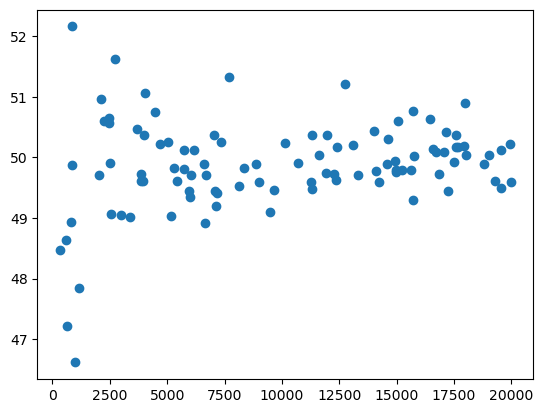

In [ ]:
import random
import matplotlib.pyplot as plt


def funzione(N):
    
    cont=0
    for i in range (N+1):
        scelte=['testa','croce']
        lancio=random.choice(scelte)
        if lancio=='testa':
            cont+=1
        
    return (cont/N)*100

lista_n=[]
lista_chiamate=[]                   #©reo liste per plottare dopo

for i in range(100):

    valore_n=random.randint(10,20000)           #genero valori interi tra 10 e 200000
    chiamata=funzione(valore_n) 
    
    lista_n.append(valore_n)
    lista_chiamate.append(chiamata)


plt.scatter(lista_n,lista_chiamate)
plt.show()




## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

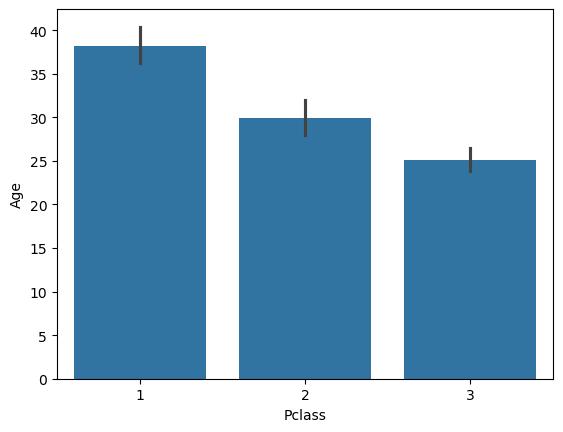

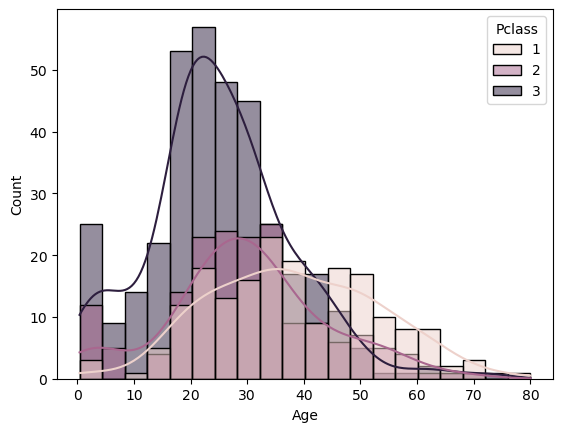

<Axes: xlabel='Pclass', ylabel='Age'>

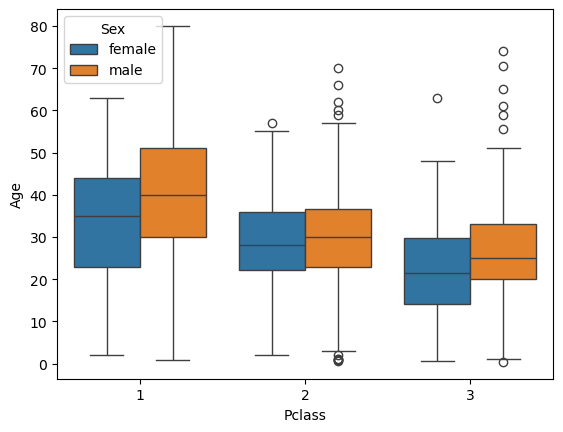

In [ ]:
# 📦 Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

righe_colonne=df.shape  #shape

valori_mancanti=df.isna().sum() #conteggio valori mancanti

moda_embarked=df['Embarked'].mode()[0]  #trovo la moda, accedo al valore
df['Embarked']=df['Embarked'].fillna(moda_embarked) #rimpiazzo il valore moda

df=df.dropna(subset=['Age'])    #elimino righe se il valore age è vuoto

df_dupl=df.duplicated().sum()   #numero righe duplicate

medie_classe=df.groupby('Pclass')['Age'].mean() #media per ciascuna classe,

df['Age']=df.apply(lambda x: medie_classe[x['Pclass']] if pd.isna(x['Age']) else x['Age'], axis=1) #applico media della specie ove il valore è nan

sns.barplot(data=df, x='Pclass', y='Age', estimator='mean') #grafico barre età media
plt.show()
sns.histplot(data=df, x='Age', hue='Pclass', kde=True) #grafico distribuzione età per classe
plt.show()
sns.boxplot(data=df, x='Pclass', y='Age', hue='Sex')    #grafico distribuzione età e sesso per classe


## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

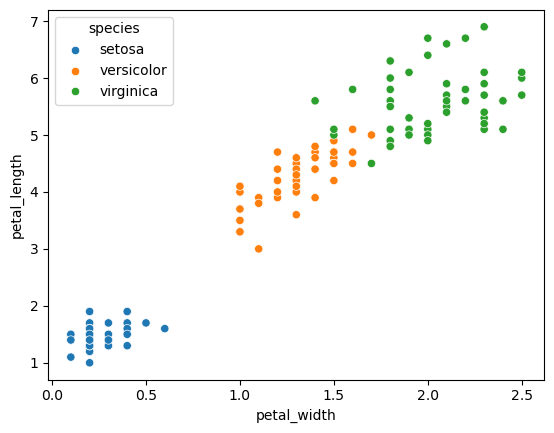

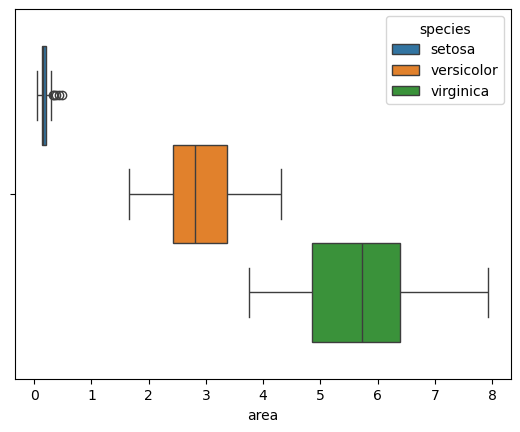

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)


conteggio_specie=df.species.value_counts()                          #conteggio campioni per ogni specie
lunghezza_media=df.groupby('species')['petal_length'].mean()        #media lunghezza raggruppando per specie
larghezza_media=df.groupby('species')['petal_width'].mean()         #media larghezza raggruppando per specie

sns.scatterplot(data=df, x='petal_width',y='petal_length',hue='species')    #uso seaborn
plt.show()
df['area']=df.petal_length*df.petal_width/2

sns.boxplot(data=df, x='area',hue='species')
plt.show()
